### ESMA 3016
### Edgar Acuna
### Lab14: Distribuciones Continuas 
### Distribucion Uniforme y su aplicacion a simulacion. Distribucion Exponencial

In [1]:
from scipy.stats  import uniform,expon
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#El valor de la funcion de densidad uniforme (0,1) en el punto .1
uniform.pdf(.1) 

1.0

In [3]:
#La probabilidad acumulada de la Uniforme (0,1) hasta .1
uniform.cdf(.1)

0.10000000000000001

In [4]:
#La probabilidad de una Uniforme entre .4 y .5 es
uniform.cdf(.5)-uniform.cdf(.4)

0.099999999999999978

(array([ 1.06025553,  1.04125095,  0.9912389 ,  0.98323697,  1.0132442 ,
         0.98323697,  0.96623287,  0.98623769,  0.99924082,  0.97823576]),
 array([  1.53004117e-04,   1.00128903e-01,   2.00104803e-01,
          3.00080702e-01,   4.00056601e-01,   5.00032501e-01,
          6.00008400e-01,   6.99984299e-01,   7.99960199e-01,
          8.99936098e-01,   9.99911997e-01]),
 <a list of 10 Patch objects>)

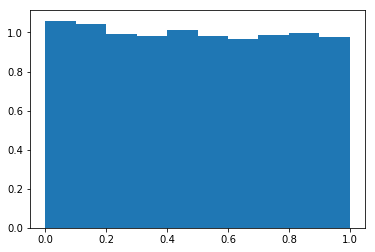

In [5]:
#Simulando 10,000 uniformes (0,1) y haciendo su histograma
plt.hist(uniform.rvs(0,1,10000),normed=True)

In [6]:
#Distribucion Uniforme en un intervalo (a,b)=(2,10)
#Hay que usar los parametros loc=a y scale=b-a
#Hallando la funcion de densidad de la uniforme U(2,10) en el punto x=2.5
uniform.pdf(2.5,loc=2,scale=8)

0.125

In [7]:
#Hallando la probabilidad acumulada de la U(2,10) hasta el valor x=6. O sea P(X<6)
uniform.cdf(6,loc=2,scale=8)

0.5

In [8]:
#Hallando el percentil correspondiente a una probabilidad de .9
uniform.ppf(.9,loc=2,scale=8)

9.1999999999999993

In [9]:
#**********************************************************
#Generando al azar n valores de una bernoulli con parametro p
#*********************************************************
def bernoulli(p,m):
    x=[0]*m
    for i in range(m):
        if uniform.rvs(0,1,1)<p:
            x[i]=1 
    return x

In [10]:
bernoulli(.3,10)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [11]:
#************************************************************
#Generando al azar m valores de una binomial con parametros n y p
#************************************************************
#La suma de n Bernoulli's da una binomial(n,p)
def rbinomial(p,n,m):
    x=[0]*m
    for i in range(m): 
        y=0
        for j in range(n):
            y+=sum(bernoulli(p,1))
        x[i]=y    
    return x

In [12]:
rbinomial(.5,6,10)

[3, 6, 4, 3, 3, 4, 3, 2, 2, 3]

In [13]:
#***************************************************************************
#simulando una muestra de 200 tiempos de espera en un banco
#se esta considerando que el tiempo de espera promedio es 10 minutos
#los tiempos estan dados en minutos
#******************************************************************************* 
tiempos=expon.rvs(scale=10,size=200)

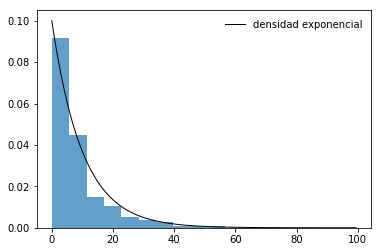

In [14]:
#Generando un histograma de los datos pero de tal manera que el area total sea 1
x=np.arange(0,100,.5)
#Haciendo una comparacion grafica
fig, ax = plt.subplots(1, 1)
ax.hist(tiempos, normed = True,alpha=.7)
ax.plot(x, expon.pdf(x,scale=10), 'k-', lw=1, label='densidad exponencial')
ax.legend(loc='best', frameon=False)

In [15]:
#Cual es la probabilidad de que se tenga que esperar mas de 15 minutos para ser atendido?
#Area bajo la curva mas alla de 15
def integrando(x):
    return np.exp(-x/10)/10
quad(integrando,15,np.Inf)

(0.22313016014842987, 2.2730397098404664e-10)

#### El primer valor es el resultado de la integral y el segundo es el error del resultado

In [16]:
#Cual es la probabilidad de que se tenga que esperar mas de 15 minutos para ser atendido?
#Area bajo la curva mas alla de 15
#Haciendolo por complemento=1-area hasta 15 y usando la densidad exponencial
1-expon.cdf(15,scale=10)

0.22313016014842979

In [17]:
#Estimando la probabilidad
probest=len(tiempos[tiempos>15])/float(200)
probest

0.15